In [2]:
import numpy as np
from matplotlib import pyplot as plt
from prova import best_fit, gaus, clean_data, apri

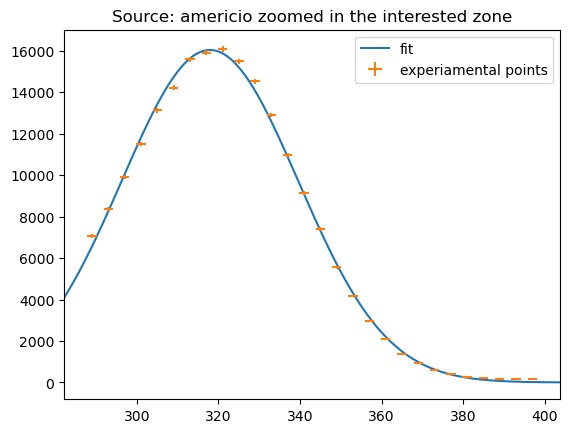

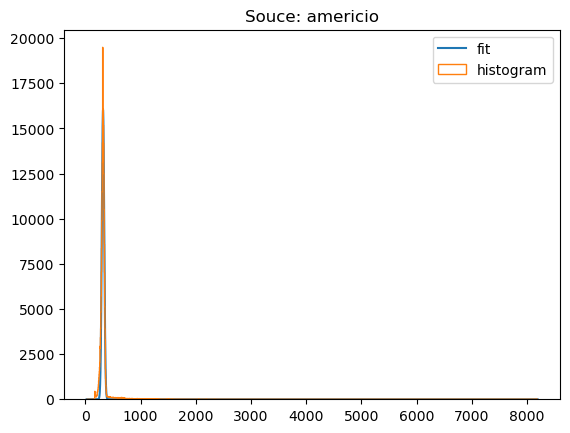

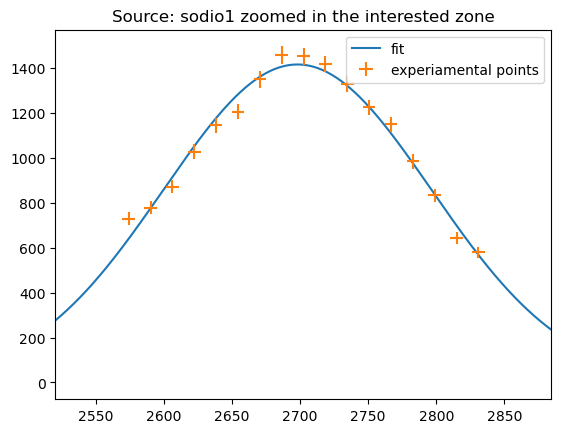

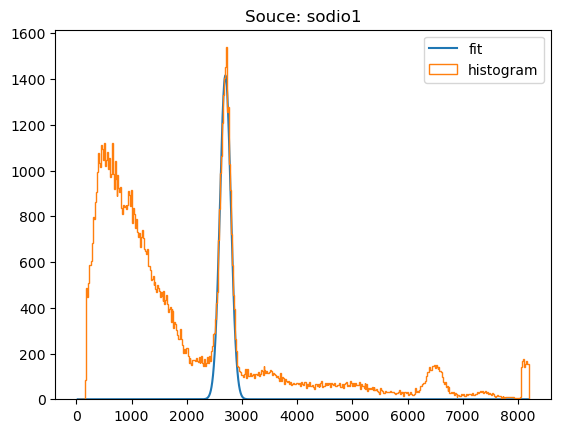

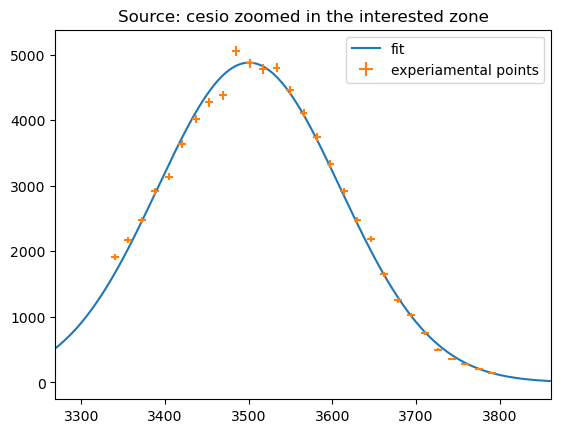

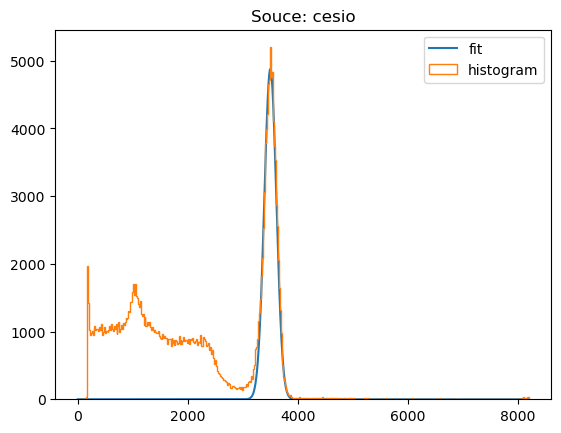

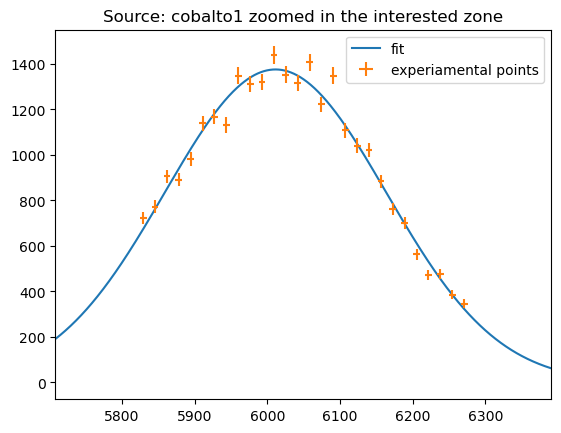

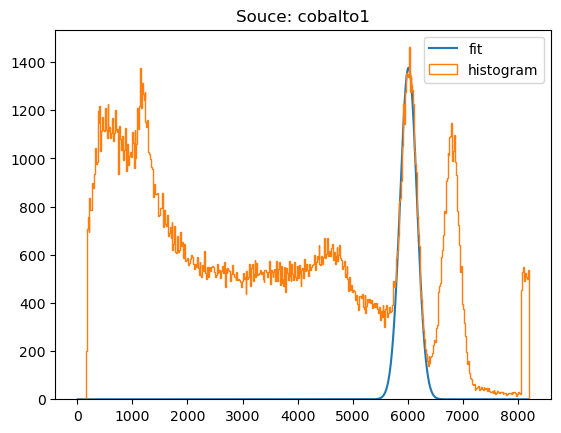

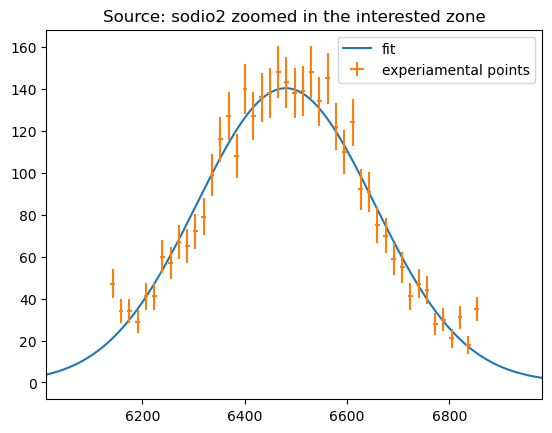

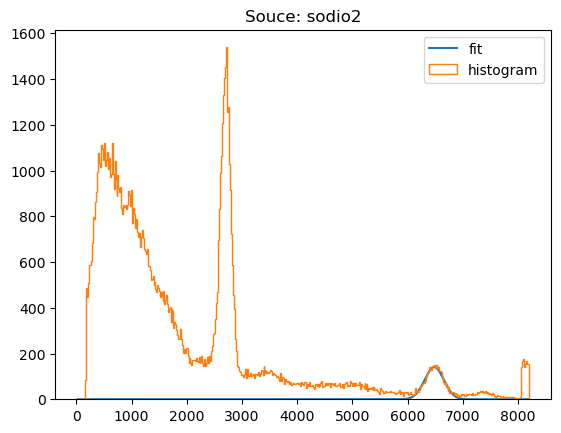

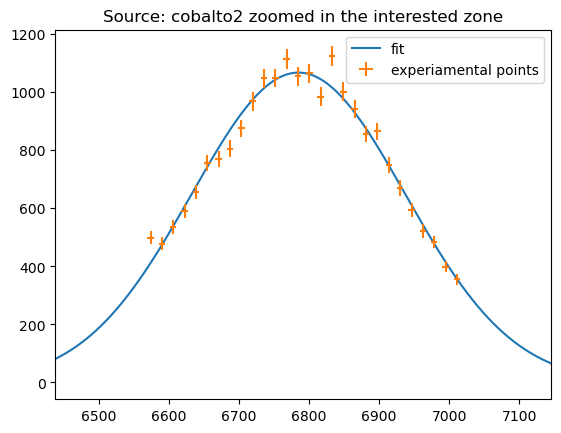

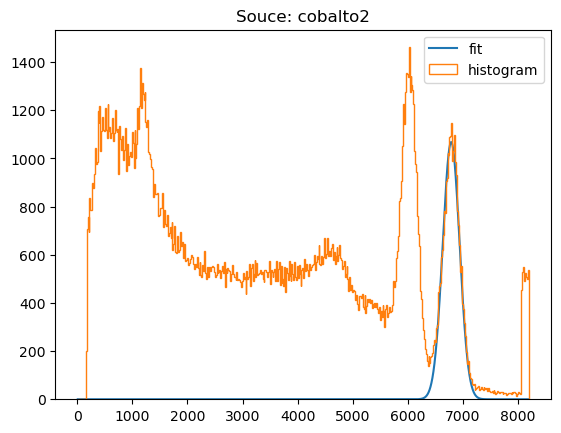

In [4]:
sorgenti = ["americio", "sodio1", "cesio", "cobalto1", "sodio2", "cobalto2"]
file = [r"Data\290323\290323_americio2.dat",
        r"Data\290323\290323_sodio2.dat",
        r"Data\290323\290323_cesio2.dat",
        r"Data\290323\290323_cobalto2.dat",
        r"Data\290323\290323_sodio2.dat",
        r"Data\290323\290323_cobalto2.dat"]
inf = np.array([286, 2565, 3331, 5820, 6133, 6565])
sup = np.array([400, 2840, 3800, 6280, 6862, 7020])
theta = np.radians(22)

media = []
err_media = []

larghezza = []
err_larghezza = []

for i in range(len(inf)):
     popt, pcov, minimo, massimo =best_fit(file[i], inf[i], sup[i], sorgenti[i])

     z=np.linspace(minimo, massimo, 100000)
     y_output = gaus(z, C=popt[0],mean=popt[1],sigma=popt[2])
    
     plt.plot(z,y_output, label='fit')

     y,E,dy,dE,_=clean_data(file[i], inf[i], sup[i], sorgenti[i])
     plt.errorbar(E,y,dy,dE,' ', label='experiamental points')

     left=min(E)
     right=max(E)

     left=left-(right+left)/100
     right=right+(right+left)/100
     plt.xlim(left=left,right=right)


     plt.title(f"Source: {sorgenti[i]} zoomed in the interested zone")
     plt.legend()
     plt.show()

     plt.plot(z,y_output, label='fit')


     plt.hist(apri(file[i]),bins= 2000 if sorgenti[i]== "americio" else 500, histtype='step',label='histogram')

     plt.title(f"Souce: {sorgenti[i]}")
     plt.legend()
     plt.show()

     media.append([popt[1]])
     err_media.append(np.sqrt(pcov[1][1]))

     larghezza.append([popt[2]])
     err_larghezza.append(np.sqrt(pcov[2][2]))
  

media=np.array(media)
err_media=np.array(err_media)

larghezza=np.array(larghezza)
err_larghezza=np.array(err_larghezza)



In [32]:
print('Media sorgenti:', media)
print('Errori:', err_media)


Media sorgenti: [[ 317.91093281]
 [2697.9768894 ]
 [3500.3038535 ]
 [6011.28045745]
 [6480.0051168 ]
 [6784.96483832]]
Errori: [0.27465121 1.53578321 1.18897073 2.37452478 3.94569086 2.01798372]
